In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_excel("../data/banaexport.xlsx")
data.drop(columns=["Fecha", "Año", "AñoWK"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Semana           1964 non-null   int64  
 1   Finca            1964 non-null   object 
 2   Área (Ha)        1964 non-null   float64
 3   Embolse          1960 non-null   float64
 4   Precipitaciones  1964 non-null   int64  
 5   Max_temp         1936 non-null   float64
 6   Min_temp         1930 non-null   float64
 7   Mean_temp        1936 non-null   float64
 8   Mean_HR          1936 non-null   float64
 9   Min_HR           1936 non-null   float64
 10  Max_HR           1936 non-null   float64
 11  Merma            1806 non-null   float64
 12  Ratio            1964 non-null   float64
 13  Recuperacion     1964 non-null   float64
 14  Cajas            1964 non-null   int64  
 15  PBR              1431 non-null   float64
 16  MO               1964 non-null   float64
 17  Ca            

In [9]:
data["Finca"].value_counts()

Finca
Fragata      491
Piragua      491
Semillero    491
Velero       491
Name: count, dtype: int64

array([[<Axes: title={'center': 'Semana'}>,
        <Axes: title={'center': 'Área (Ha)'}>,
        <Axes: title={'center': 'Embolse'}>,
        <Axes: title={'center': 'Precipitaciones'}>,
        <Axes: title={'center': 'Max_temp'}>],
       [<Axes: title={'center': 'Min_temp'}>,
        <Axes: title={'center': 'Mean_temp'}>,
        <Axes: title={'center': 'Mean_HR'}>,
        <Axes: title={'center': 'Min_HR'}>,
        <Axes: title={'center': 'Max_HR'}>],
       [<Axes: title={'center': 'Merma'}>,
        <Axes: title={'center': 'Ratio'}>,
        <Axes: title={'center': 'Recuperacion'}>,
        <Axes: title={'center': 'Cajas'}>,
        <Axes: title={'center': 'PBR'}>],
       [<Axes: title={'center': 'MO'}>, <Axes: title={'center': 'Ca'}>,
        <Axes: title={'center': 'CICE'}>, <Axes: title={'center': 'Mg'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'pH'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

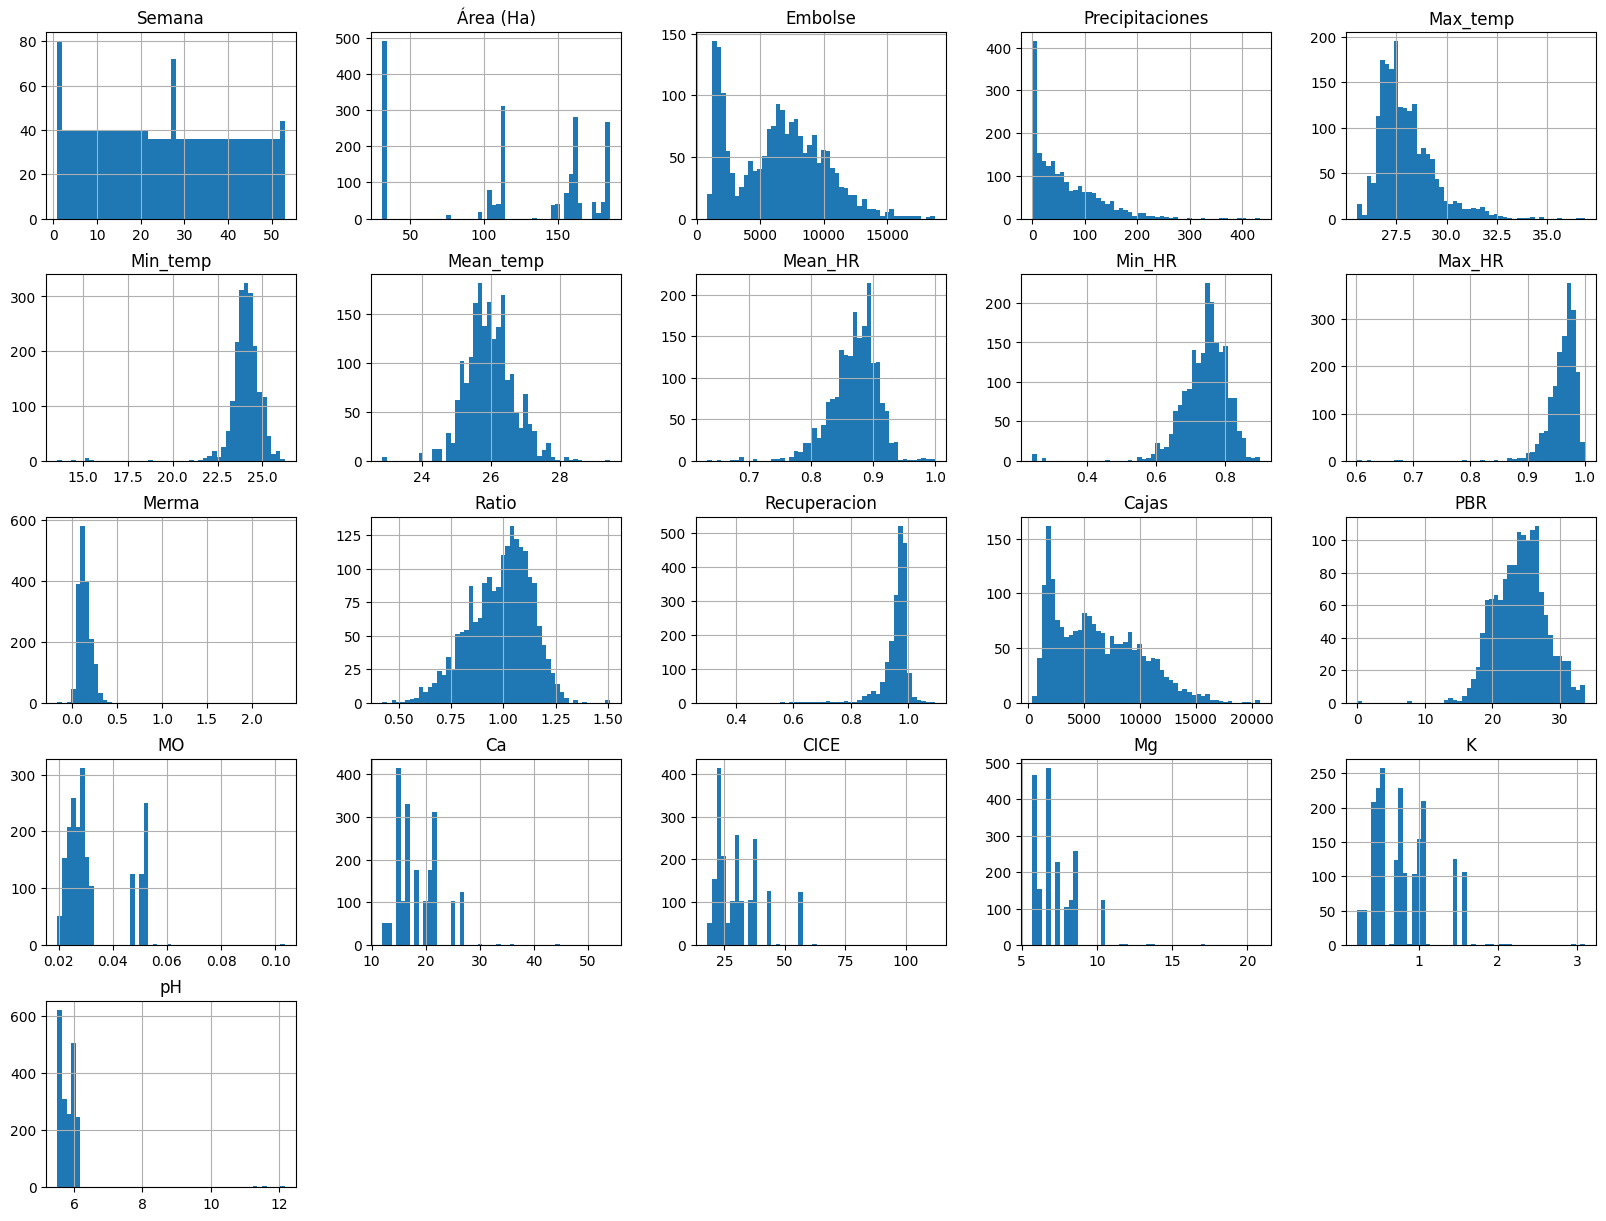

In [12]:
data.hist(bins=50, figsize=(20,15))

<Axes: >

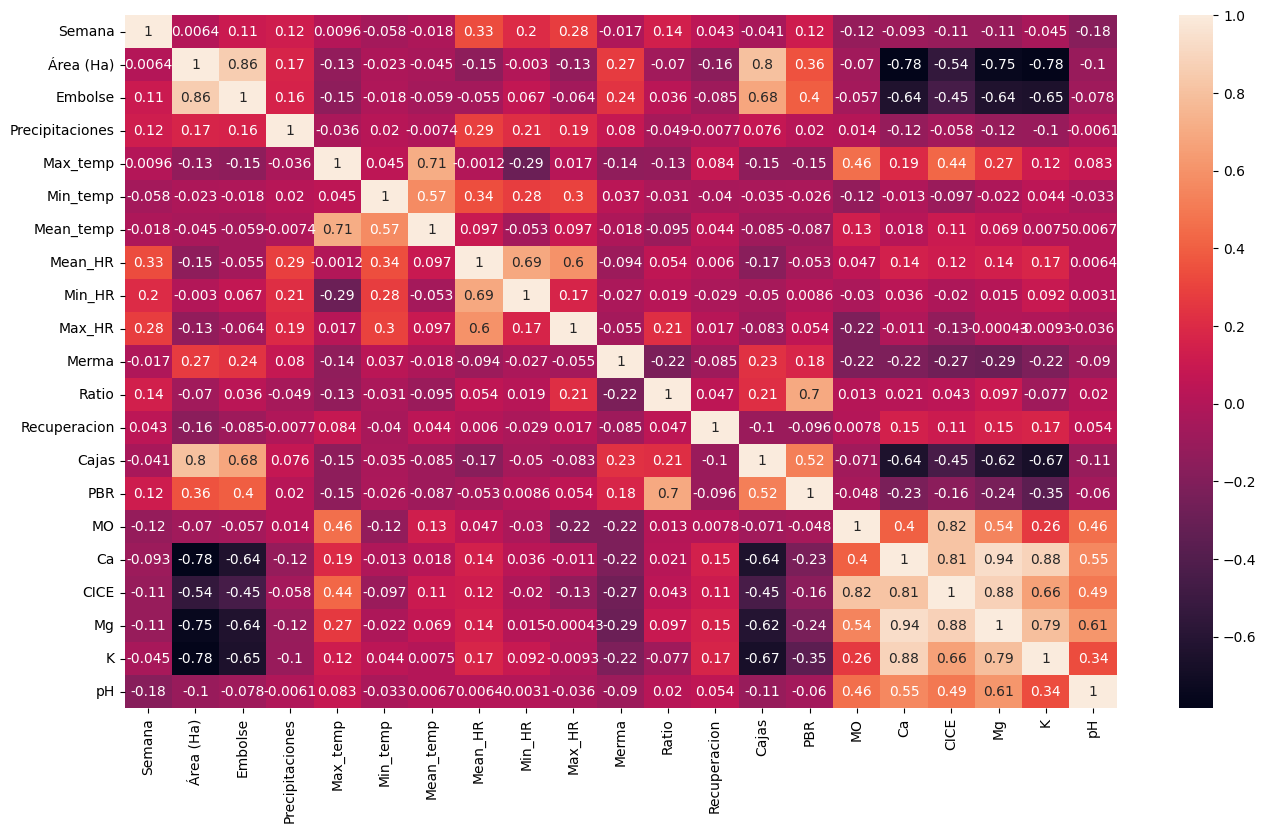

In [14]:
# Drop the categorical variable 'ocean_proximity' from the correlation matrix
correlation_matrix = data.drop('Finca', axis=1).corr()

# Plot the heatmap with the updated correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
correlation_matrix["Cajas"].sort_values(ascending=False)

Cajas              1.000000
Área (Ha)          0.804587
Embolse            0.682664
PBR                0.521863
Merma              0.229483
Ratio              0.214066
Precipitaciones    0.075751
Min_temp          -0.035429
Semana            -0.040501
Min_HR            -0.049505
MO                -0.071017
Max_HR            -0.082753
Mean_temp         -0.084556
Recuperacion      -0.100387
pH                -0.111315
Max_temp          -0.148602
Mean_HR           -0.168364
CICE              -0.449587
Mg                -0.616851
Ca                -0.639387
K                 -0.667756
Name: Cajas, dtype: float64

In [19]:
to_clean = ["PBR", "Merma", "Max_HR", "Min_HR", "Mean_temp", "Max_temp", "Min_temp", "Mean_temp", "Embolse", "Mean_HR"]
for col in to_clean:
  data[col].fillna(data[col].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Semana           1964 non-null   int64  
 1   Finca            1964 non-null   object 
 2   Área (Ha)        1964 non-null   float64
 3   Embolse          1964 non-null   float64
 4   Precipitaciones  1964 non-null   int64  
 5   Max_temp         1964 non-null   float64
 6   Min_temp         1964 non-null   float64
 7   Mean_temp        1964 non-null   float64
 8   Mean_HR          1964 non-null   float64
 9   Min_HR           1964 non-null   float64
 10  Max_HR           1964 non-null   float64
 11  Merma            1964 non-null   float64
 12  Ratio            1964 non-null   float64
 13  Recuperacion     1964 non-null   float64
 14  Cajas            1964 non-null   int64  
 15  PBR              1964 non-null   float64
 16  MO               1964 non-null   float64
 17  Ca            

C:\Users\olvad\AppData\Local\Temp\ipykernel_5756\3015529470.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\olvad\AppData\Local\Temp\ipykernel_5756\3015529470.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [25]:
# manipulacion de datos categoricos
from sklearn.preprocessing import OrdinalEncoder

data_finca = data[["Finca"]]
ordinal_enconder = OrdinalEncoder()
data_finca_encoded = ordinal_enconder.fit_transform(data_finca)
data_finca_encoded

array([[0.],
       [1.],
       [2.],
       ...,
       [1.],
       [2.],
       [3.]])

In [26]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

data_1_hot_encoder = one_hot_encoder.fit_transform(data_finca)

In [27]:
data_1_hot_encoder.toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [28]:
encoded_df = pd.DataFrame(data_1_hot_encoder.toarray(), columns=one_hot_encoder.categories_)
encoded_df.head()

,Fragata,Piragua,Semillero,Velero
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [31]:
y = data["Cajas"].values.reshape(-1, 1)

In [32]:
x = data[[
  "Área (Ha)",          
  "Embolse",            
  "PBR",             
  "Merma",             
  "Ratio",             
  "Precipitaciones"
]]

In [33]:
data_full = pd.concat([x, encoded_df], axis=1)
data_full.columns

Index([      'Área (Ha)',         'Embolse',             'PBR',
                 'Merma',           'Ratio', 'Precipitaciones',
            ('Fragata',),      ('Piragua',),    ('Semillero',),
             ('Velero',)],
      dtype='object')

In [34]:
x = data_full.values

In [35]:
### regression lineal multiple

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

y_predict = linear_regression.predict(x_test)

In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predict)
r2

0.7552035044435006

In [38]:
from sklearn.preprocessing import StandardScaler

ss_x = StandardScaler()

x = ss_x.fit_transform(x)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

y_predict = linear_regression.predict(x_test)

In [40]:
r2 = r2_score(y_test, y_predict)
r2

0.7551107230522701

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
columns = [
  "Área (Ha)",          
  "Embolse",            
  "PBR",             
  "Merma",             
  "Ratio",             
  "Precipitaciones"
]

cols_model = []
y = data["Cajas"].values.reshape(-1, 1)

for col in columns:
  cols_model.append(col)
  data1 = data[cols_model]
  data1 = pd.concat([data1, encoded_df], axis=1)
  x = data1.values
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  
  tree_reg = DecisionTreeRegressor()
  tree_reg.fit(x_train, y_train)
  y_predict = tree_reg.predict(x_test)
  
  r2 = r2_score(y_test, y_predict)
  print(cols_model, r2)

['Área (Ha)'] 0.7578912921127455
['Área (Ha)', 'Embolse'] 0.5254264778310949
['Área (Ha)', 'Embolse', 'PBR'] 0.5429934123955977
['Área (Ha)', 'Embolse', 'PBR', 'Merma'] 0.4844534055903654
['Área (Ha)', 'Embolse', 'PBR', 'Merma', 'Ratio'] 0.5972086041415257
['Área (Ha)', 'Embolse', 'PBR', 'Merma', 'Ratio', 'Precipitaciones'] 0.6193954140101432


In [45]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
columns = [
    "Semana", "Área (Ha)", "Embolse", "Precipitaciones", "Max_temp", 
    "Min_temp", "Mean_temp", "Mean_HR", "Min_HR", "Max_HR", "MO", "Ca", "CICE", "Mg", "K", "pH"
]

cols_model = []
y = data["Cajas"].values

for col in columns:
  cols_model.append(col)
  data1 = data[cols_model]
  data1 = pd.concat([data1, encoded_df], axis=1)
  x = data1.values
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  
  forest_reg = RandomForestRegressor()
  forest_reg.fit(x_train, y_train)
  
  y_predict = forest_reg.predict(x_test)
  
  r2 = r2_score(y_test, y_predict)
  print(cols_model, r2)

['Semana'] 0.7444049054822082
['Semana', 'Área (Ha)'] 0.76804368690054
['Semana', 'Área (Ha)', 'Embolse'] 0.7832806154177724
['Semana', 'Área (Ha)', 'Embolse', 'Precipitaciones'] 0.7848896048104101
['Semana', 'Área (Ha)', 'Embolse', 'Precipitaciones', 'Max_temp'] 0.7964549381855315
['Semana', 'Área (Ha)', 'Embolse', 'Precipitaciones', 'Max_temp', 'Min_temp'] 0.7945898740058108
['Semana', 'Área (Ha)', 'Embolse', 'Precipitaciones', 'Max_temp', 'Min_temp', 'Mean_temp'] 0.7956922504566254
['Semana', 'Área (Ha)', 'Embolse', 'Precipitaciones', 'Max_temp', 'Min_temp', 'Mean_temp', 'Mean_HR'] 0.7989511534309695
['Semana', 'Área (Ha)', 'Embolse', 'Precipitaciones', 'Max_temp', 'Min_temp', 'Mean_temp', 'Mean_HR', 'Min_HR'] 0.7932368497920596
['Semana', 'Área (Ha)', 'Embolse', 'Precipitaciones', 'Max_temp', 'Min_temp', 'Mean_temp', 'Mean_HR', 'Min_HR', 'Max_HR'] 0.7944783993322967
['Semana', 'Área (Ha)', 'Embolse', 'Precipitaciones', 'Max_temp', 'Min_temp', 'Mean_temp', 'Mean_HR', 'Min_HR', 'Max_